In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

#Step 1: DATA COLLECTION

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/snakessilver/Skills_traits/main/Employee_skills_traits.csv")
df.head()

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   ID                                     998 non-null    int64
 1   Employment period                      998 non-null    int64
 2   Time in current department             998 non-null    int64
 3   Gender                                 998 non-null    int64
 4   Team leader                            998 non-null    int64
 5   Age                                    998 non-null    int64
 6   Member of professional organizations   998 non-null    int64
 7   .Net                                   998 non-null    int64
 8   SQL Server                             998 non-null    int64
 9   HTML CSS Java Script                   998 non-null    int64
 10  PHP mySQL                              998 non-null    int64
 11  Fast working                    

#Step 2: DATA PRE-PROCESSING

In [4]:
#checking for missing values
df.isnull().sum()

ID                                       0
Employment period                        0
Time in current department               0
Gender                                   0
Team leader                              0
Age                                      0
Member of professional organizations     0
.Net                                     0
SQL Server                               0
HTML CSS Java Script                     0
PHP mySQL                                0
Fast working                             0
Awards                                   0
Communicative                            0
dtype: int64

In [5]:
df.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

In [6]:
#Removing spaces from column names
df=df.rename(columns={"Employment period ":"Employment Period",
          "Time in current department ":"Time in current department",
          "Gender ":"Gender",
          "Team leader ":"Team leader",
          "Age ":"Age",
          "Member of professional organizations ":"Member of professional organizations",
          ".Net ":".Net",
          "SQL Server ":"SQL Server",
          "HTML CSS Java Script ":"HTML CSS Java Script",
          "PHP mySQL ":"PHP mySQL",
          "Communicative ":"Communicative"})

df.columns

Index(['ID', 'Employment Period', 'Time in current department', 'Gender',
       'Team leader', 'Age', 'Member of professional organizations', '.Net',
       'SQL Server', 'HTML CSS Java Script', 'PHP mySQL', 'Fast working',
       'Awards', 'Communicative'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   ID                                    998 non-null    int64
 1   Employment Period                     998 non-null    int64
 2   Time in current department            998 non-null    int64
 3   Gender                                998 non-null    int64
 4   Team leader                           998 non-null    int64
 5   Age                                   998 non-null    int64
 6   Member of professional organizations  998 non-null    int64
 7   .Net                                  998 non-null    int64
 8   SQL Server                            998 non-null    int64
 9   HTML CSS Java Script                  998 non-null    int64
 10  PHP mySQL                             998 non-null    int64
 11  Fast working                          998 non

In [8]:
df.describe()

,ID,Employment Period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,9710.248497,10.388778,5.660321,0.484970,0.504008,40.441884,0.48998,0.476954,0.475952,0.508016,0.477956,0.503006,0.502004,0.521042
std,5639.386232,5.787715,3.196953,0.500025,0.500235,8.059964,0.50015,0.499719,0.499672,0.500186,0.499764,0.500242,0.500247,0.499808
min,235.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4878.500000,5.000000,3.000000,0.000000,0.000000,34.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9413.000000,10.000000,5.000000,0.000000,1.000000,40.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,14619.750000,15.000000,8.000000,1.000000,1.000000,47.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,20078.000000,20.000000,12.000000,1.000000,1.000000,55.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['ID'].value_counts()

6593     2
9759     2
5170     2
8854     2
19175    2
        ..
11498    1
2836     1
17959    1
3232     1
17170    1
Name: ID, Length: 974, dtype: int64

In [10]:
#removing duplicates
df.drop_duplicates(subset = 'ID', keep = 'first', inplace = True)
df

,ID,Employment Period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1


In [11]:
df['ID'].value_counts()

6723     1
18713    1
9706     1
5165     1
2437     1
        ..
3484     1
1780     1
10623    1
17298    1
17170    1
Name: ID, Length: 974, dtype: int64

In [12]:
df[df["Employment Period"]>df["Age"]]

,ID,Employment Period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative


In [13]:
df[df["Time in current department"]>df["Age"]]

,ID,Employment Period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative


#Step 3: EXPLORATORY DATA ANALYSIS

1) Employment period

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17bbf07e10>]],
      dtype=object)

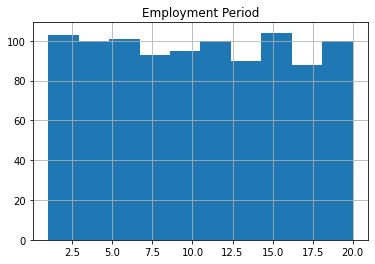

In [14]:
#looking at the distribution of data
df.hist(column='Employment Period')

In [15]:
df['Employment Period'].describe()

count    974.000000
mean      10.383984
std        5.803602
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Employment Period, dtype: float64

The above analysis indicates that the data points are near to each other as the difference between the three quartile values is less.

{'boxes': [<matplotlib.lines.Line2D at 0x7f17bb977950>],
 'caps': [<matplotlib.lines.Line2D at 0x7f17bb97d9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f17bb906a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f17bb9064d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f17bbe5e410>,
  <matplotlib.lines.Line2D at 0x7f17bb97d490>]}

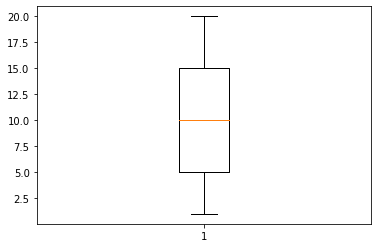

In [16]:
#looking for outliers
plt.boxplot(df['Employment Period'])

The plot indicates that there are no outliers and the data is equally distributed around the median

2) Time in current department

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17bb9364d0>]],
      dtype=object)

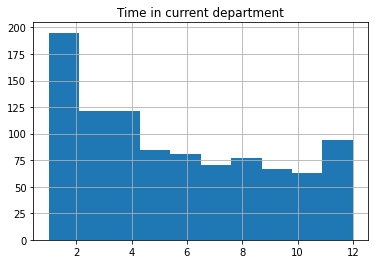

In [17]:
df.hist(column='Time in current department')

In [18]:
df['Time in current department'].describe()

count    974.000000
mean       5.666324
std        3.206903
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       12.000000
Name: Time in current department, dtype: float64

The above analysis indicates that the data points are near to each other as the difference between the three quartile values is less.

{'boxes': [<matplotlib.lines.Line2D at 0x7f17bb80ad50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f17bb814dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f17bb81ae10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f17bb81a8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f17bb814350>,
  <matplotlib.lines.Line2D at 0x7f17bb814890>]}

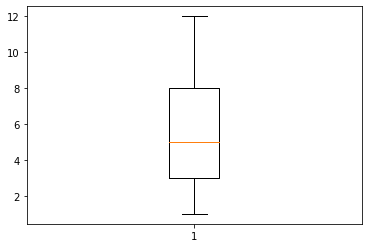

In [19]:
plt.boxplot(df['Time in current department'])

The plot indicates that there are no outliers and the more number of data points that are greater than the median.

3) Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17bb80a790>]],
      dtype=object)

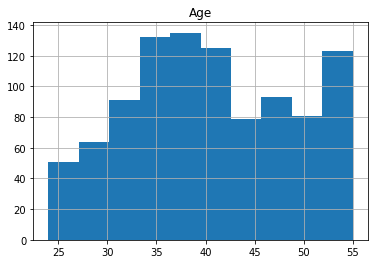

In [20]:
df.hist(column='Age')

In [21]:
df['Age'].describe()

count    974.000000
mean      40.468172
std        8.080181
min       24.000000
25%       34.000000
50%       40.000000
75%       47.000000
max       55.000000
Name: Age, dtype: float64

The above analysis indicates that the data points are near to each other as the difference between the three quartile values is less.

{'boxes': [<matplotlib.lines.Line2D at 0x7f17bb713d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f17bb719dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f17bb71fe10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f17bb71f8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f17bb719350>,
  <matplotlib.lines.Line2D at 0x7f17bb719890>]}

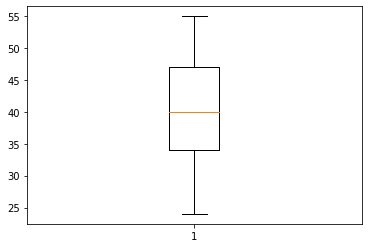

In [22]:
plt.boxplot(df['Age'])

The plot indicates that there are no outliers and the data is well distributed around the median.

4) Gender

In [23]:
df['Gender'].value_counts()

0    502
1    472
Name: Gender, dtype: int64

The data shows that there are 514 female and 484 male.

5) Team leader

In [24]:
df['Team leader'].value_counts()

1    491
0    483
Name: Team leader, dtype: int64

6) Member of professional organizations

In [25]:
df['Member of professional organizations'].value_counts()

0    494
1    480
Name: Member of professional organizations, dtype: int64

7) .Net

In [26]:
df['.Net'].value_counts()

0    511
1    463
Name: .Net, dtype: int64

8) SQL Server

In [27]:
df['SQL Server'].value_counts()

0    509
1    465
Name: SQL Server, dtype: int64

9) HTML CSS Java Script

In [28]:
df['HTML CSS Java Script'].value_counts()

1    497
0    477
Name: HTML CSS Java Script, dtype: int64

10) PHP mySQL

In [29]:
df['PHP mySQL'].value_counts()

0    509
1    465
Name: PHP mySQL, dtype: int64

11) Fast working

In [30]:
df['Fast working'].value_counts()

1    493
0    481
Name: Fast working, dtype: int64

12) Awards

In [31]:
df['Awards'].value_counts()

1    490
0    484
Name: Awards, dtype: int64

13)  Communicative

In [32]:
df['Communicative'].value_counts()

1    508
0    466
Name: Communicative, dtype: int64

*Age & Employment period

In [33]:
df.columns

Index(['ID', 'Employment Period', 'Time in current department', 'Gender',
       'Team leader', 'Age', 'Member of professional organizations', '.Net',
       'SQL Server', 'HTML CSS Java Script', 'PHP mySQL', 'Fast working',
       'Awards', 'Communicative'],
      dtype='object')

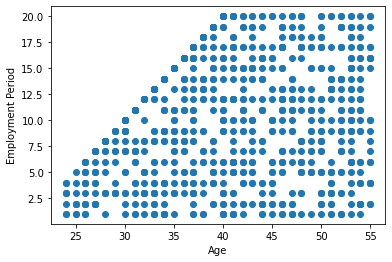

In [34]:
#Understanding the correlation between two features using scatter plots
plt.scatter(df['Age'], df['Employment Period'])
plt.xlabel("Age")
plt.ylabel("Employment Period")
plt.show()

In [35]:
df['Age'].corr(df['Employment Period'])

0.16561981982286003

The above graph indicates that the period of employment varies irrespective of the employees' age. And the graph does not show any specific pattern also the correlation coefficient is very less which means the features are weakly correlated.

*Age & Time in current department

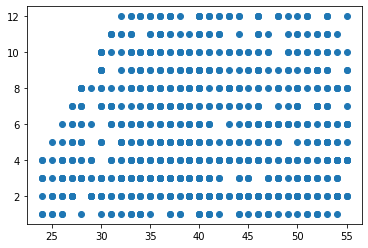

In [36]:
plt.scatter(df['Age'], df['Time in current department'])
plt.show()

In [37]:
df['Age'].corr(df['Time in current department'])

0.07492866973858783

The above graph indicates that the period of employment varies irrespective of the employees' age. And the graph does not show any specific pattern also the correlation coefficient is very less which means the features are weakly correlated.

*Employment period & Time in current department

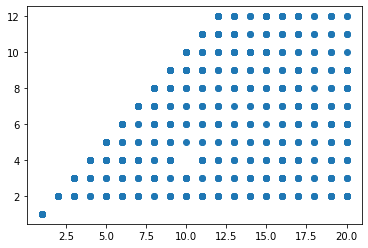

In [38]:
plt.scatter(df['Employment Period'], df['Time in current department'])
plt.show()

In [39]:
df['Employment Period'].corr(df['Time in current department'])

0.4959277446659778

The above graph indicates that the period of employment varies irrespective of the employees' age. The graph does not show any specific pattern and even though the correlation coefficient is 0.49 it is still less which means the features are weakly correlated.

#Step 4: Data Transformation - Binning

In [40]:
cut_labels_4 = ['entry', 'mid', 'sr', 'exec']
cut_bins = [1, 3, 8, 15, 20]
df['cut_Employment Period'] = pd.cut(df['Employment Period'], bins=cut_bins, labels=cut_labels_4)
df

,ID,Employment Period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment Period
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1,mid
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0,mid
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1,sr
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0,mid
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1,exec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1,sr
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1,exec
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0,sr
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1,mid


In [41]:
cut_labels_4 = ['fresher', 'senior', 'experienced']
cut_bins = [1, 2, 8, 12]
df['cut_Time in current department'] = pd.cut(df['Time in current department'], bins=cut_bins, labels=cut_labels_4)
df

,ID,Employment Period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment Period,cut_Time in current department
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1,mid,senior
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0,mid,senior
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1,sr,senior
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0,mid,senior
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1,exec,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1,sr,senior
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1,exec,senior
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0,sr,senior
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1,mid,senior


In [42]:
cut_labels_4 = ['youngster', 'middle_aged', 'old']
cut_bins = [24, 30, 50, 55]
df['cut_Age'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels_4)
df

,ID,Employment Period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment Period,cut_Time in current department,cut_Age
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1,mid,senior,middle_aged
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0,mid,senior,youngster
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1,sr,senior,middle_aged
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0,mid,senior,youngster
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1,exec,senior,middle_aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1,sr,senior,middle_aged
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1,exec,senior,middle_aged
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0,sr,senior,middle_aged
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1,mid,senior,middle_aged


In [43]:
df['Gender'].replace(0, 'Female',inplace=True)
df['Gender'].replace(1, 'Male',inplace=True)
df

,ID,Employment Period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment Period,cut_Time in current department,cut_Age
0,6723,5,4,Female,1,48,1,1,1,0,1,1,0,1,mid,senior,middle_aged
1,8923,5,3,Male,1,26,1,1,0,0,1,1,0,0,mid,senior,youngster
2,2322,11,8,Female,0,34,0,0,1,1,0,1,0,1,sr,senior,middle_aged
3,235,7,5,Male,1,27,1,0,1,0,1,1,1,0,mid,senior,youngster
4,9523,18,8,Female,0,38,0,0,0,1,1,1,1,1,exec,senior,middle_aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,Male,1,32,1,0,0,0,1,1,0,1,sr,senior,middle_aged
994,12133,16,8,Male,0,36,1,1,1,0,0,0,1,1,exec,senior,middle_aged
995,854,11,4,Female,1,34,1,0,1,0,1,1,0,0,sr,senior,middle_aged
996,13444,8,8,Male,0,36,0,0,1,0,0,0,1,1,mid,senior,middle_aged


#Step 5: Data Transformation (conversion)

In [44]:
df2 = pd.get_dummies(df)
df2

,ID,Employment Period,Time in current department,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,...,cut_Employment Period_entry,cut_Employment Period_mid,cut_Employment Period_sr,cut_Employment Period_exec,cut_Time in current department_fresher,cut_Time in current department_senior,cut_Time in current department_experienced,cut_Age_youngster,cut_Age_middle_aged,cut_Age_old
0,6723,5,4,1,48,1,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,8923,5,3,1,26,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,2322,11,8,0,34,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
3,235,7,5,1,27,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
4,9523,18,8,0,38,0,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,32,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
994,12133,16,8,0,36,1,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
995,854,11,4,1,34,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
996,13444,8,8,0,36,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [45]:
df2.columns

Index(['ID', 'Employment Period', 'Time in current department', 'Team leader',
       'Age', 'Member of professional organizations', '.Net', 'SQL Server',
       'HTML CSS Java Script', 'PHP mySQL', 'Fast working', 'Awards',
       'Communicative', 'Gender_Female', 'Gender_Male',
       'cut_Employment Period_entry', 'cut_Employment Period_mid',
       'cut_Employment Period_sr', 'cut_Employment Period_exec',
       'cut_Time in current department_fresher',
       'cut_Time in current department_senior',
       'cut_Time in current department_experienced', 'cut_Age_youngster',
       'cut_Age_middle_aged', 'cut_Age_old'],
      dtype='object')

#Step 6: Dimensionality Reduction

In [46]:
#removing unwanted columns for apriori algo
tdf = df2.drop(['ID', 'Employment Period', 'Time in current department', 'Age'], 1)
tdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,Gender_Female,...,cut_Employment Period_entry,cut_Employment Period_mid,cut_Employment Period_sr,cut_Employment Period_exec,cut_Time in current department_fresher,cut_Time in current department_senior,cut_Time in current department_experienced,cut_Age_youngster,cut_Age_middle_aged,cut_Age_old
0,1,1,1,1,0,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,1,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0
3,1,1,0,1,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,1,0,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
994,0,1,1,1,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
995,1,1,0,1,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
996,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [47]:
tdf.describe()

,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,Gender_Female,...,cut_Employment Period_entry,cut_Employment Period_mid,cut_Employment Period_sr,cut_Employment Period_exec,cut_Time in current department_fresher,cut_Time in current department_senior,cut_Time in current department_experienced,cut_Age_youngster,cut_Age_middle_aged,cut_Age_old
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.00000,...,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,0.504107,0.492813,0.475359,0.477413,0.510267,0.477413,0.506160,0.503080,0.521561,0.51540,...,0.108830,0.246407,0.342916,0.249487,0.147844,0.569815,0.229979,0.109856,0.725873,0.156057
std,0.500240,0.500205,0.499649,0.499746,0.500151,0.499746,0.500219,0.500247,0.499792,0.50002,...,0.311585,0.431139,0.474928,0.432938,0.355128,0.495356,0.421036,0.312871,0.446303,0.363096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
tdf.columns

Index(['Team leader', 'Member of professional organizations', '.Net',
       'SQL Server', 'HTML CSS Java Script', 'PHP mySQL', 'Fast working',
       'Awards', 'Communicative', 'Gender_Female', 'Gender_Male',
       'cut_Employment Period_entry', 'cut_Employment Period_mid',
       'cut_Employment Period_sr', 'cut_Employment Period_exec',
       'cut_Time in current department_fresher',
       'cut_Time in current department_senior',
       'cut_Time in current department_experienced', 'cut_Age_youngster',
       'cut_Age_middle_aged', 'cut_Age_old'],
      dtype='object')

In [49]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 997
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Team leader                                 974 non-null    int64
 1   Member of professional organizations        974 non-null    int64
 2   .Net                                        974 non-null    int64
 3   SQL Server                                  974 non-null    int64
 4   HTML CSS Java Script                        974 non-null    int64
 5   PHP mySQL                                   974 non-null    int64
 6   Fast working                                974 non-null    int64
 7   Awards                                      974 non-null    int64
 8   Communicative                               974 non-null    int64
 9   Gender_Female                               974 non-null    uint8
 10  Gender_Male                           

#Step 7: Generating Frequent Items

In [50]:
freq_items = apriori(tdf, min_support = 0.25, use_colnames = True)
freq_items

,support,itemsets
0,0.504107,(Team leader)
1,0.492813,(Member of professional organizations)
2,0.475359,(.Net)
3,0.477413,(SQL Server)
4,0.510267,(HTML CSS Java Script)
...,...,...
57,0.380903,"(cut_Age_middle_aged, Gender_Female)"
58,0.285421,"(cut_Time in current department_senior, Gender..."
59,0.344969,"(cut_Age_middle_aged, Gender_Male)"
60,0.261807,"(cut_Employment Period_sr, cut_Age_middle_aged)"


#Step 8: Generating Association Rules

In [51]:
ass_rules = association_rules(freq_items, metric ="lift", min_threshold = 1)
ass_rules = ass_rules.sort_values(['lift', 'confidence'], ascending =[False, False]) 
ass_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Team leader),(Communicative),0.504107,0.521561,0.291581,0.578411,1.109001,0.028659,1.134849
2,(Communicative),(Team leader),0.521561,0.504107,0.291581,0.559055,1.109001,0.028659,1.124615
39,(Fast working),(cut_Time in current department_senior),0.506160,0.569815,0.304928,0.602434,1.057245,0.016510,1.082046
38,(cut_Time in current department_senior),(Fast working),0.569815,0.506160,0.304928,0.535135,1.057245,0.016510,1.062330
36,(Fast working),(Gender_Female),0.506160,0.515400,0.275154,0.543611,1.054734,0.014279,1.061812


In [52]:
def get_frq_items(min_support):
    return apriori(tdf, min_support, use_colnames = True)
def get_association_rules(frq_items):
    rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
    return rules.sort_values(['lift', 'confidence'], ascending =[False, False])
def execute(min_support):
    frq_items = get_frq_items(min_support)
    # print(frq_items.head())
    rules = get_association_rules(frq_items)
    return rules

#Step 9: ITERATING BY VARYING PARAMETERS

In [53]:
#An association rule has two parts: an antecedent (if) and a consequent (then). 
#An antecedent is an item found within the data. A consequent is an item found in combination with the antecedent.
execute(0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
117,(cut_Employment Period_sr),(cut_Time in current department_experienced),0.342916,0.229979,0.149897,0.437126,1.900716,0.071034,1.368015
116,(cut_Time in current department_experienced),(cut_Employment Period_sr),0.229979,0.342916,0.149897,0.651786,1.900716,0.071034,1.887011
1074,"(cut_Employment Period_sr, cut_Age_middle_aged)",(cut_Time in current department_experienced),0.261807,0.229979,0.112936,0.431373,1.875700,0.052726,1.354174
1075,(cut_Time in current department_experienced),"(cut_Employment Period_sr, cut_Age_middle_aged)",0.229979,0.261807,0.112936,0.491071,1.875700,0.052726,1.450485
1072,"(cut_Time in current department_experienced, c...",(cut_Employment Period_sr),0.182752,0.342916,0.112936,0.617978,1.802126,0.050268,1.720014
...,...,...,...,...,...,...,...,...,...
197,(Team leader),"(Fast working, SQL Server)",0.504107,0.242300,0.122177,0.242363,1.000259,0.000032,1.000083
448,"(Communicative, cut_Age_middle_aged)",(Member of professional organizations),0.360370,0.492813,0.177618,0.492877,1.000131,0.000023,1.000127
449,(Member of professional organizations),"(Communicative, cut_Age_middle_aged)",0.492813,0.360370,0.177618,0.360417,1.000131,0.000023,1.000074
1197,"(cut_Time in current department_senior, HTML C...",(cut_Age_middle_aged),0.138604,0.725873,0.100616,0.725926,1.000073,0.000007,1.000194


In [54]:
execute(0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
75,(cut_Employment Period_mid),(cut_Time in current department_senior),0.246407,0.569815,0.222793,0.904167,1.586772,0.082386,4.488885
74,(cut_Time in current department_senior),(cut_Employment Period_mid),0.569815,0.246407,0.222793,0.390991,1.586772,0.082386,1.237409
78,(cut_Employment Period_exec),(cut_Age_middle_aged),0.249487,0.725873,0.211499,0.847737,1.167886,0.030403,1.800350
79,(cut_Age_middle_aged),(cut_Employment Period_exec),0.725873,0.249487,0.211499,0.291372,1.167886,0.030403,1.059108
94,"(cut_Time in current department_senior, cut_Ag...",(Fast working),0.403491,0.506160,0.226899,0.562341,1.110994,0.022668,1.128367
...,...,...,...,...,...,...,...,...,...
45,(Awards),(HTML CSS Java Script),0.503080,0.510267,0.257700,0.512245,1.003876,0.000995,1.004055
25,(.Net),(Fast working),0.475359,0.506160,0.241273,0.507559,1.002764,0.000665,1.002841
24,(Fast working),(.Net),0.506160,0.475359,0.241273,0.476673,1.002764,0.000665,1.002511
35,(SQL Server),(Fast working),0.477413,0.506160,0.242300,0.507527,1.002700,0.000652,1.002775


In [55]:
execute(0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Team leader),(Communicative),0.504107,0.521561,0.291581,0.578411,1.109001,0.028659,1.134849
2,(Communicative),(Team leader),0.521561,0.504107,0.291581,0.559055,1.109001,0.028659,1.124615
39,(Fast working),(cut_Time in current department_senior),0.506160,0.569815,0.304928,0.602434,1.057245,0.016510,1.082046
38,(cut_Time in current department_senior),(Fast working),0.569815,0.506160,0.304928,0.535135,1.057245,0.016510,1.062330
36,(Fast working),(Gender_Female),0.506160,0.515400,0.275154,0.543611,1.054734,0.014279,1.061812
37,(Gender_Female),(Fast working),0.515400,0.506160,0.275154,0.533865,1.054734,0.014279,1.059434
52,(cut_Employment Period_sr),(cut_Age_middle_aged),0.342916,0.725873,0.261807,0.763473,1.051800,0.012894,1.158969
53,(cut_Age_middle_aged),(cut_Employment Period_sr),0.725873,0.342916,0.261807,0.360679,1.051800,0.012894,1.027784
20,(SQL Server),(Gender_Female),0.477413,0.515400,0.258727,0.541935,1.051484,0.012668,1.057929
21,(Gender_Female),(SQL Server),0.515400,0.477413,0.258727,0.501992,1.051484,0.012668,1.049355


In [56]:
execute(0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Fast working),(cut_Time in current department_senior),0.506160,0.569815,0.304928,0.602434,1.057245,0.016510,1.082046
4,(cut_Time in current department_senior),(Fast working),0.569815,0.506160,0.304928,0.535135,1.057245,0.016510,1.062330
9,(Communicative),(cut_Time in current department_senior),0.521561,0.569815,0.308008,0.590551,1.036391,0.010815,1.050644
8,(cut_Time in current department_senior),(Communicative),0.569815,0.521561,0.308008,0.540541,1.036391,0.010815,1.041309
7,(cut_Age_middle_aged),(Fast working),0.725873,0.506160,0.376797,0.519095,1.025554,0.009389,1.026896
6,(Fast working),(cut_Age_middle_aged),0.506160,0.725873,0.376797,0.744422,1.025554,0.009389,1.072577
11,(Gender_Female),(cut_Age_middle_aged),0.515400,0.725873,0.380903,0.739044,1.018145,0.006788,1.050473
10,(cut_Age_middle_aged),(Gender_Female),0.725873,0.515400,0.380903,0.524752,1.018145,0.006788,1.019678
1,(.Net),(cut_Age_middle_aged),0.475359,0.725873,0.351129,0.738661,1.017618,0.006079,1.048933
0,(cut_Age_middle_aged),(.Net),0.725873,0.475359,0.351129,0.483734,1.017618,0.006079,1.016222


In [57]:
execute(0.4)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [58]:
execute(0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [59]:
execute(0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
